# Overfitting and Regularization

## 1. 과적합과 정규화

&nbsp;&nbsp;&nbsp; 머신러닝 모델이 학습 데이터에 대한 성능이 과도하게 좋아서 검증용 데이터나 다른 데이터에 대해서는 오히려 성능이 떨어지는 경우를 과적합이라고 합니다. 일반적으로 모델의 복잡성이 지나칠 경우 발생합니다.

&nbsp;&nbsp;&nbsp; 그렇다면 이러한 과적합을 어떻게 해결할 수 있을까요? 가장 대표적인 방법이 바로 정규화입니다(Regularization; Standardization, Normalization과 혼동 주의!!!). 정규화는 모델의 가중치를 제한해서 일반화 성능시키는 기법입니다.

## 2. 정규화 종류

### 1)L1 정규화(Lasso)

&nbsp;&nbsp;&nbsp; 라쏘는 MSE를 활용한 것입니다. 하지만 훈련용 데이터의 오차만을 최소화하면 과적합이 발생할 수 있기에 가중치의 절대값 합을 패널티로 추가합니다.

$$
\text{Loss function} = \text{MSE} + \lambda \sum_{i} |w_i|
$$

&nbsp;&nbsp;&nbsp; λ (람다)는 하이퍼파라미터입니다. 수식에서 가중치(w)를 0 혹은 0에 가깝게 해야 합니다. 이 방법을 통해 모델을 일반화한다는 이점 외에 특성 선택(feature selection)이 자동으로 이루어진다는 효과를 가질 수 있습니다.


### 2)L2 정규화

&nbsp;&nbsp;&nbsp; 릿지는 라쏘와 비슷하지만 정규화 항에 가중치의 절대값이 아닌 제곱합을 패널티로 추가한다는 점이 다릅니다. 그리고 릿지가 1제곱, 라쏘가 2제곱을 사용한다는 점에서 L1, L2라는 이름이 붙었습니다. 이는 모든 가중치가 작은 값을 가지도록 만들며, 모델의 복잡성을 감소시킵니다.

$$
\text{Loss function} = \text{MSE} + \lambda \sum_{i} w_i^2
$$

### 3)Elastic Net

&nbsp;&nbsp;&nbsp; Elastic Net은 L1과 L2 정규화를 함께 사용하는 방법입니다. 이 방법은 L1의 특성 선택 효과와 L2의 안정성을 결합합니다. 손실 함수는 다음과 같습니다:

$$
\text{Loss function} = \text{MSE} + \lambda_1 \sum_{i} |w_i| + \lambda_2 \sum_{i} w_i^2
$$

### 4)Dropout

&nbsp;&nbsp;&nbsp; Dropout은 신경망에서 사용되는 정규화 기법으로, 학습 중에 랜덤하게 일부 뉴런을 비활성화합니다. 이는 모델이 특정 뉴런이나 경로에 의존하지 않도록 하여 과적합을 방지합니다.

### 5)데이터 증대(Data Augmentation)

&nbsp;&nbsp;&nbsp; 이미지나 텍스트 데이터에 많이 사용되는 방법으로, 훈련 데이터셋에 변형된 데이터를 추가해서 기존 모델의 일반화 가능성을 높입니다.

### 6)조기 종료(Early Stopping)

&nbsp;&nbsp;&nbsp; 모델의 성능이 더 이상 향상되지 않을 때, 즉 최적 지점에서 학습을 종료하는 방법입니다.

## 3. 정리

&nbsp;&nbsp;&nbsp; 1)정규화의 이점 : 과적합 방지, 모델의 복잡성 감소, 안정적 학습

&nbsp;&nbsp;&nbsp; 2)주의 사항 : 적절한 하이퍼파라미터 조절, 데이터 특성 고려


## 4. 참고자료

&nbsp;&nbsp;&nbsp; -https://muzukphysics.tistory.com/120

&nbsp;&nbsp;&nbsp; https://bommbom.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EA%B3%BC%EC%A0%81%ED%95%A9Overfitting-%ED%95%B4%EC%86%8C-%EB%B0%A9%EB%B2%95-%EC%A0%95%EA%B7%9C%ED%99%94

## 5. 코드 실습 : 선형회귀와 정규화

&nbsp;&nbsp;&nbsp; -참고 : https://www.kaggle.com/code/niteshyadav3103/linear-regression-regularization-lasso-ridge

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [1]:
from sklearn.datasets import load_boston

data = load_boston() # reading data

In [5]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
df['MEDV'] = data.target


df['MEDV'] = data.target 코드에서 data.target은 일반적으로 scikit-learn 라이브러리의 데이터셋에서 사용됩니다. 이 경우 data는 아마도 scikit-learn의 내장 데이터셋 중 하나인 보스턴 주택 가격 데이터셋일 것입니다. 보스턴 주택 가격 데이터셋은 주택의 다양한 특징(특성)을 기반으로 주택의 중간 가격(Median Value, MEDV)을 예측하는 회귀 문제를 다룹니다.

data.target은 각 주택의 중간 가격을 나타내는 값을 포함하고 있습니다. 따라서 df['MEDV'] = data.target 코드는 데이터프레임 df에 MEDV라는 새로운 열을 추가하고, 이 열에 보스턴 주택 가격 데이터셋의 타겟 값(즉, 중간 주택 가격)을 할당합니다.

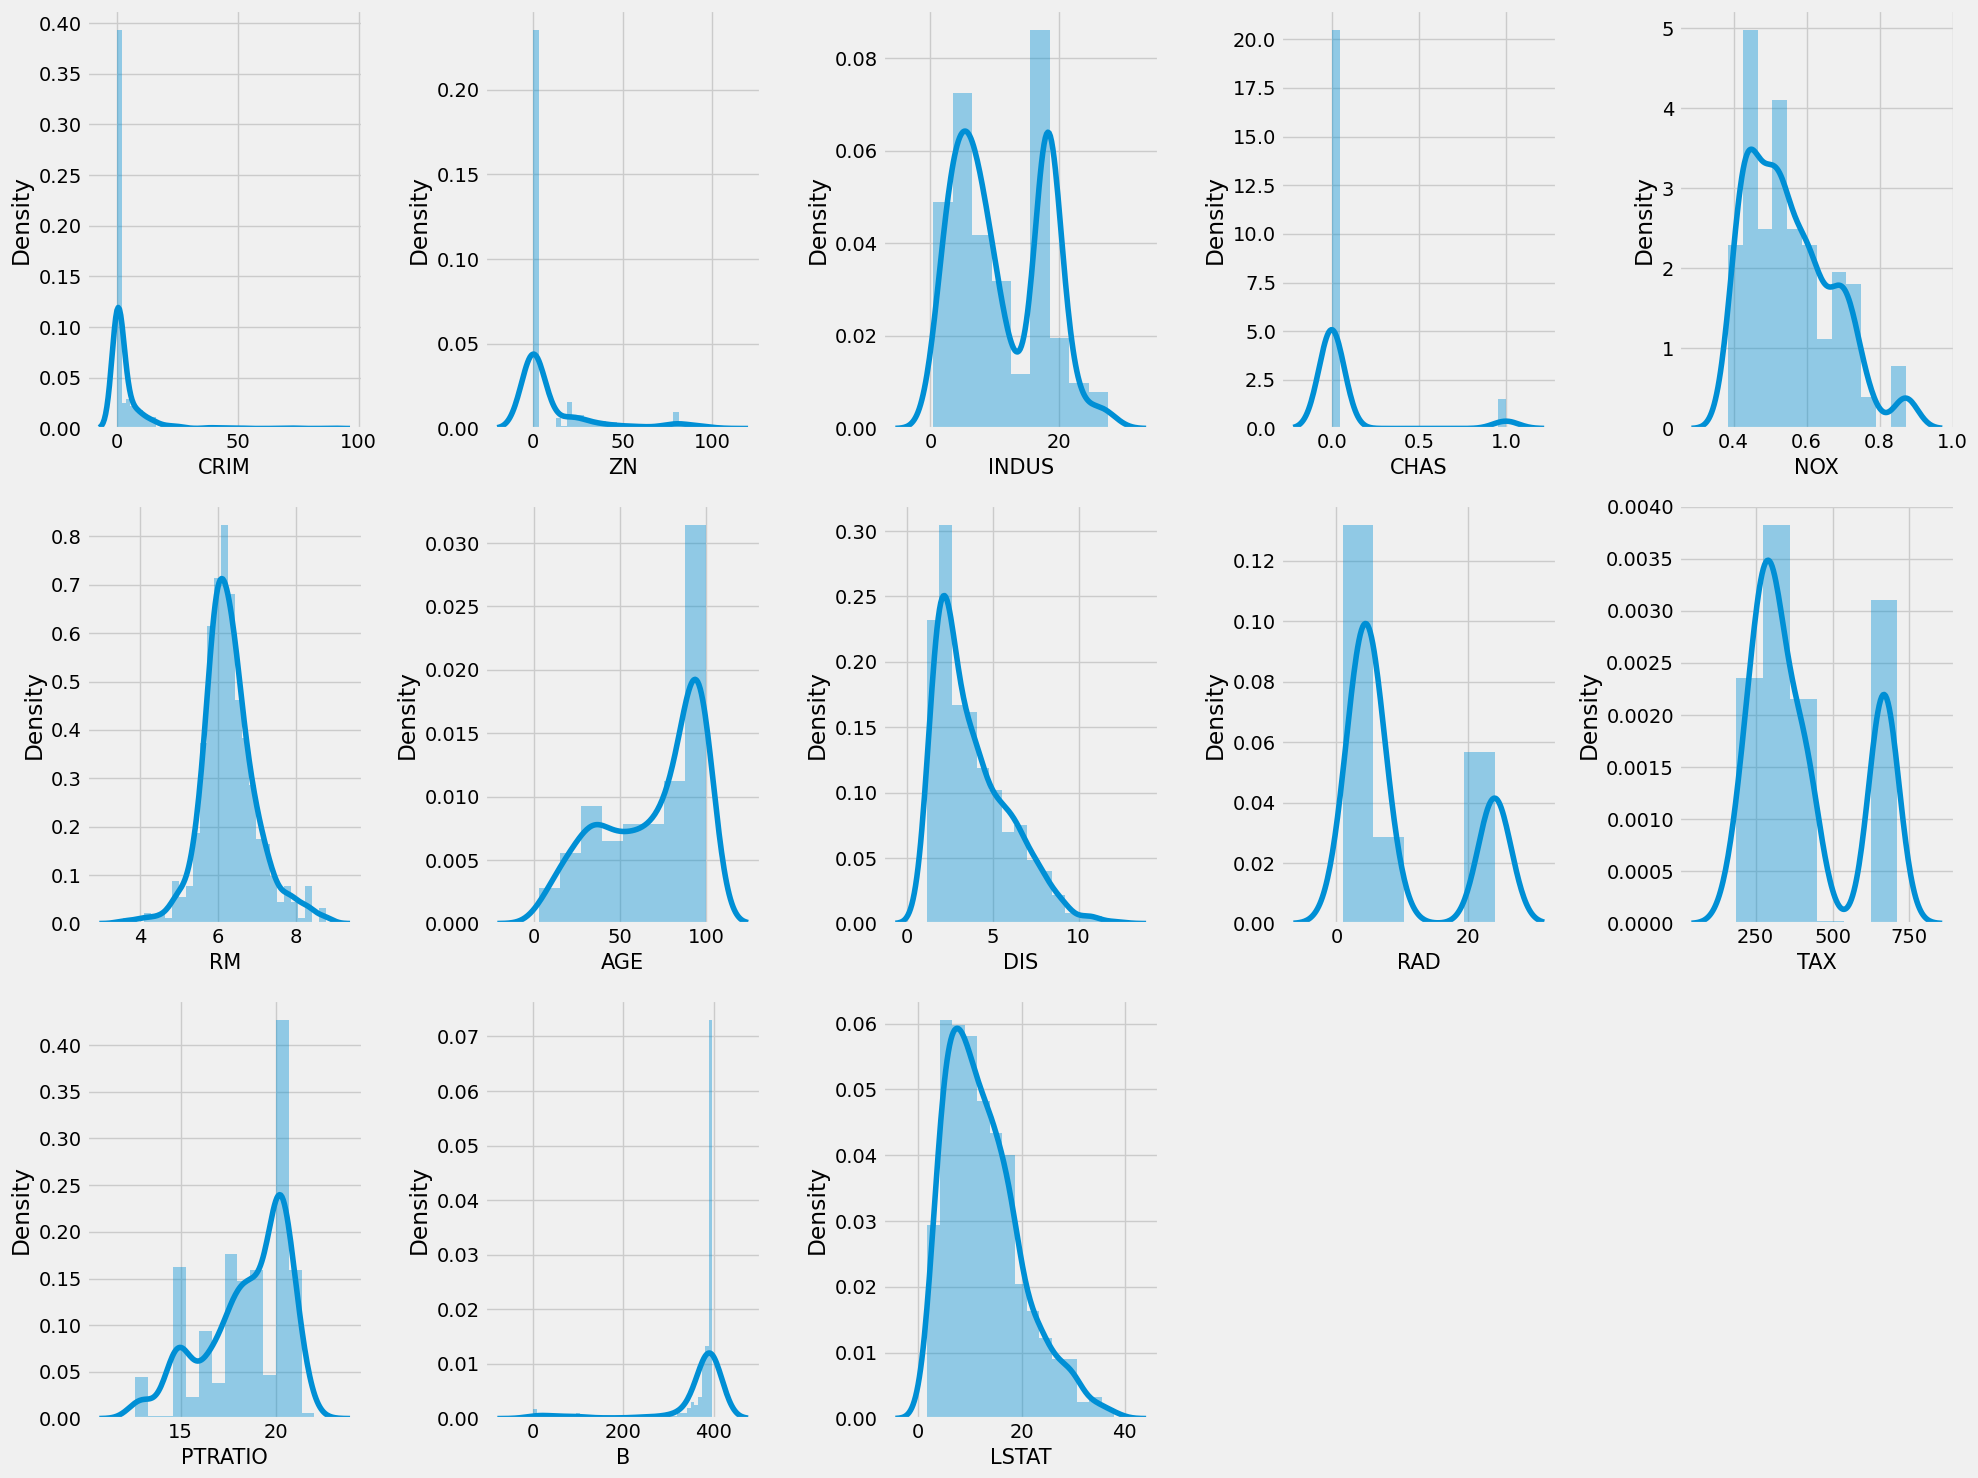

In [8]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

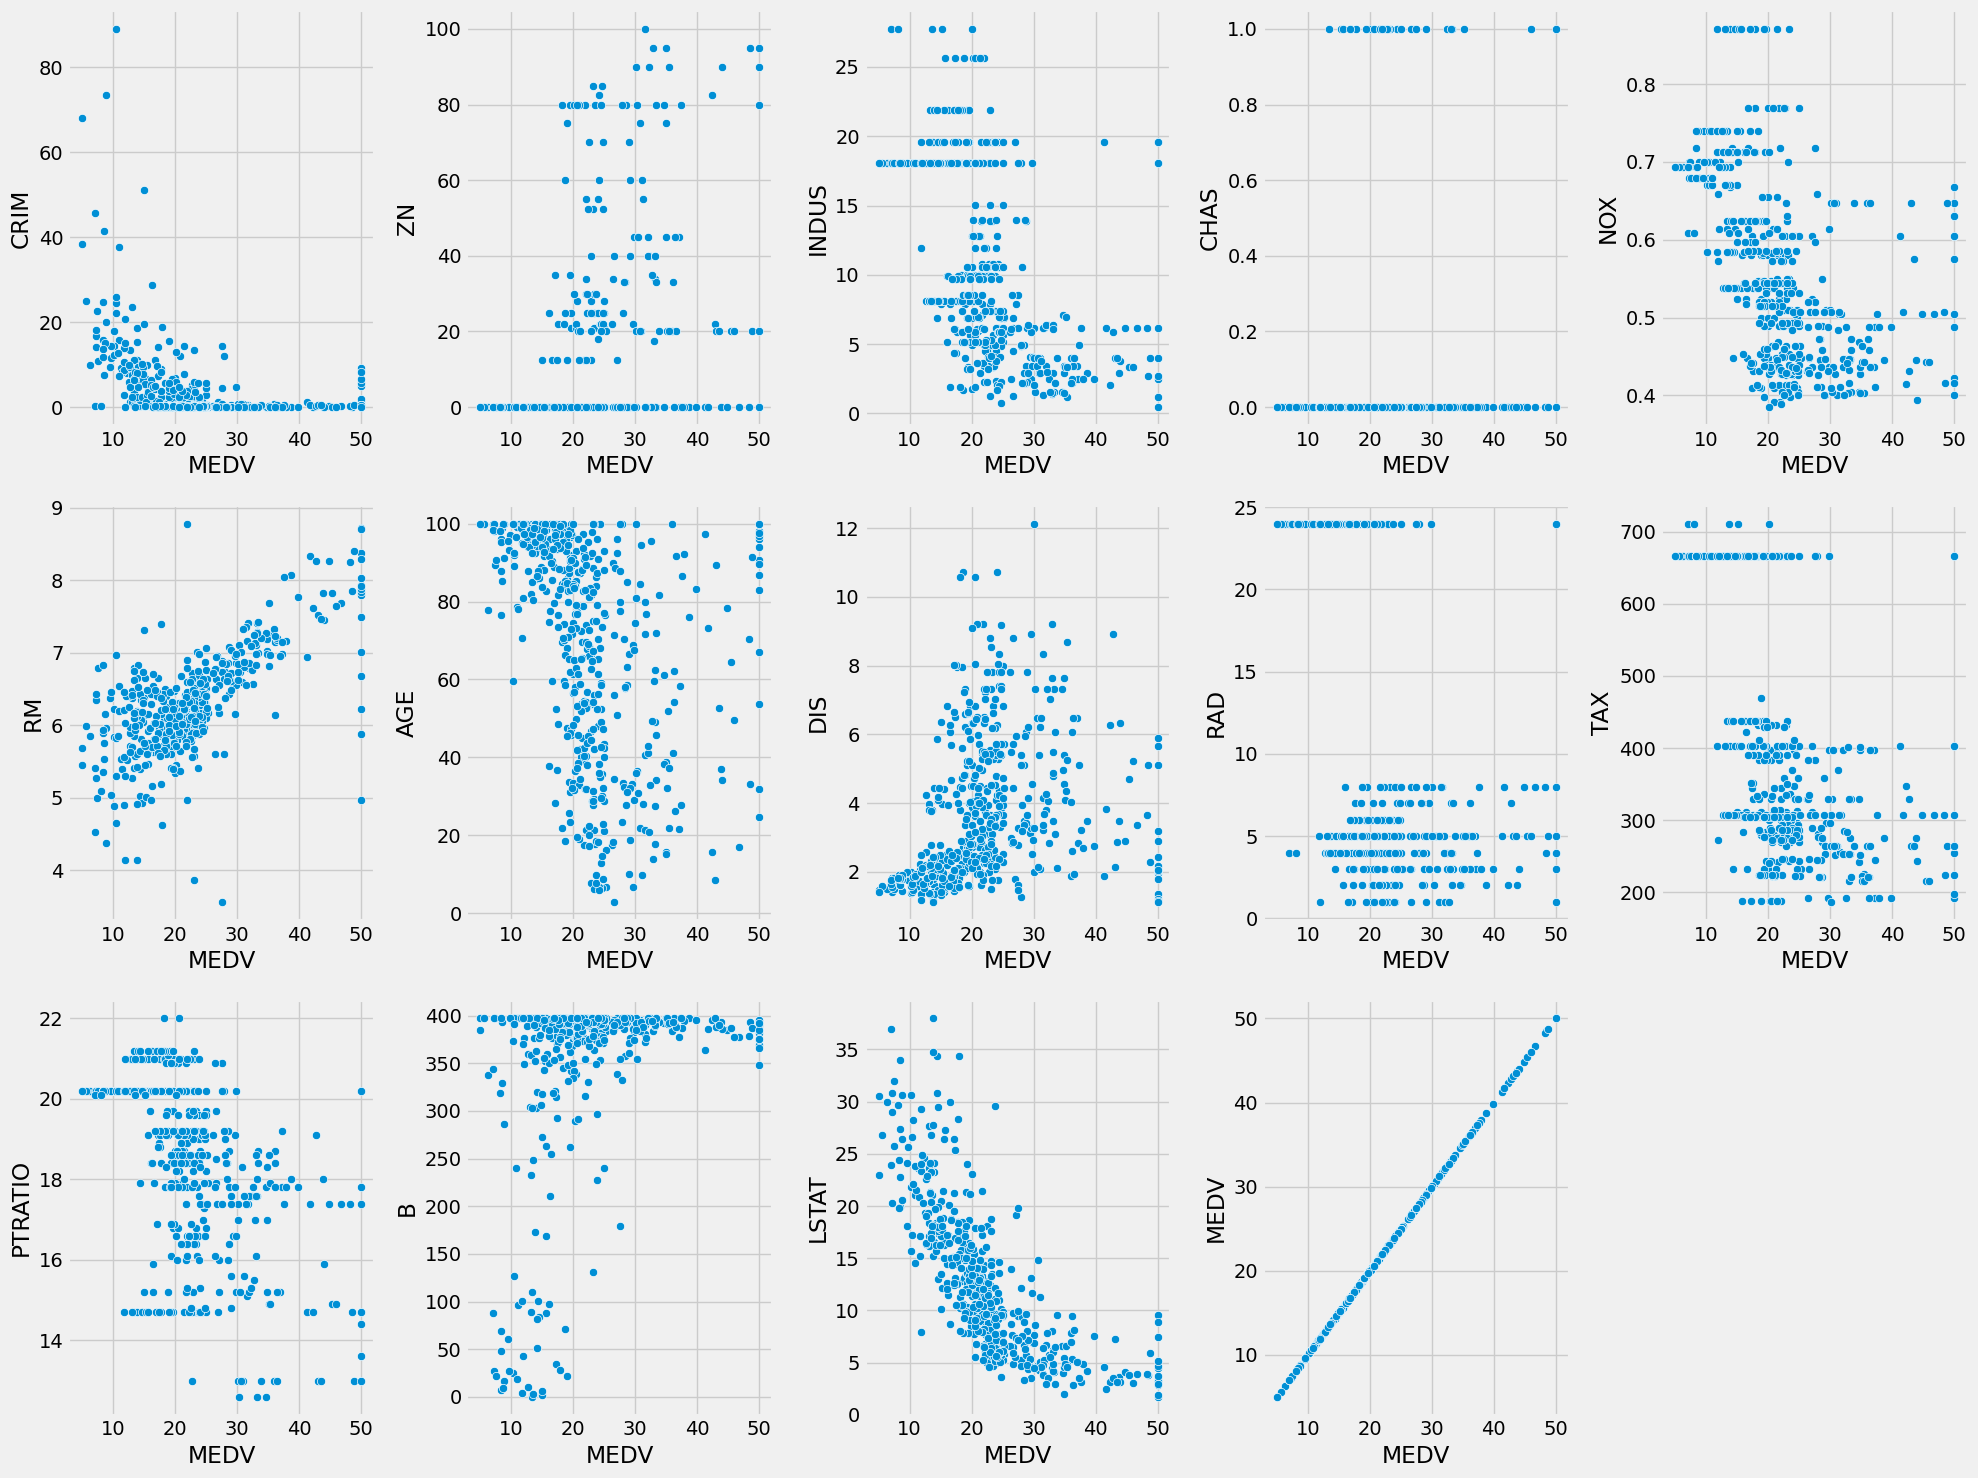

In [11]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

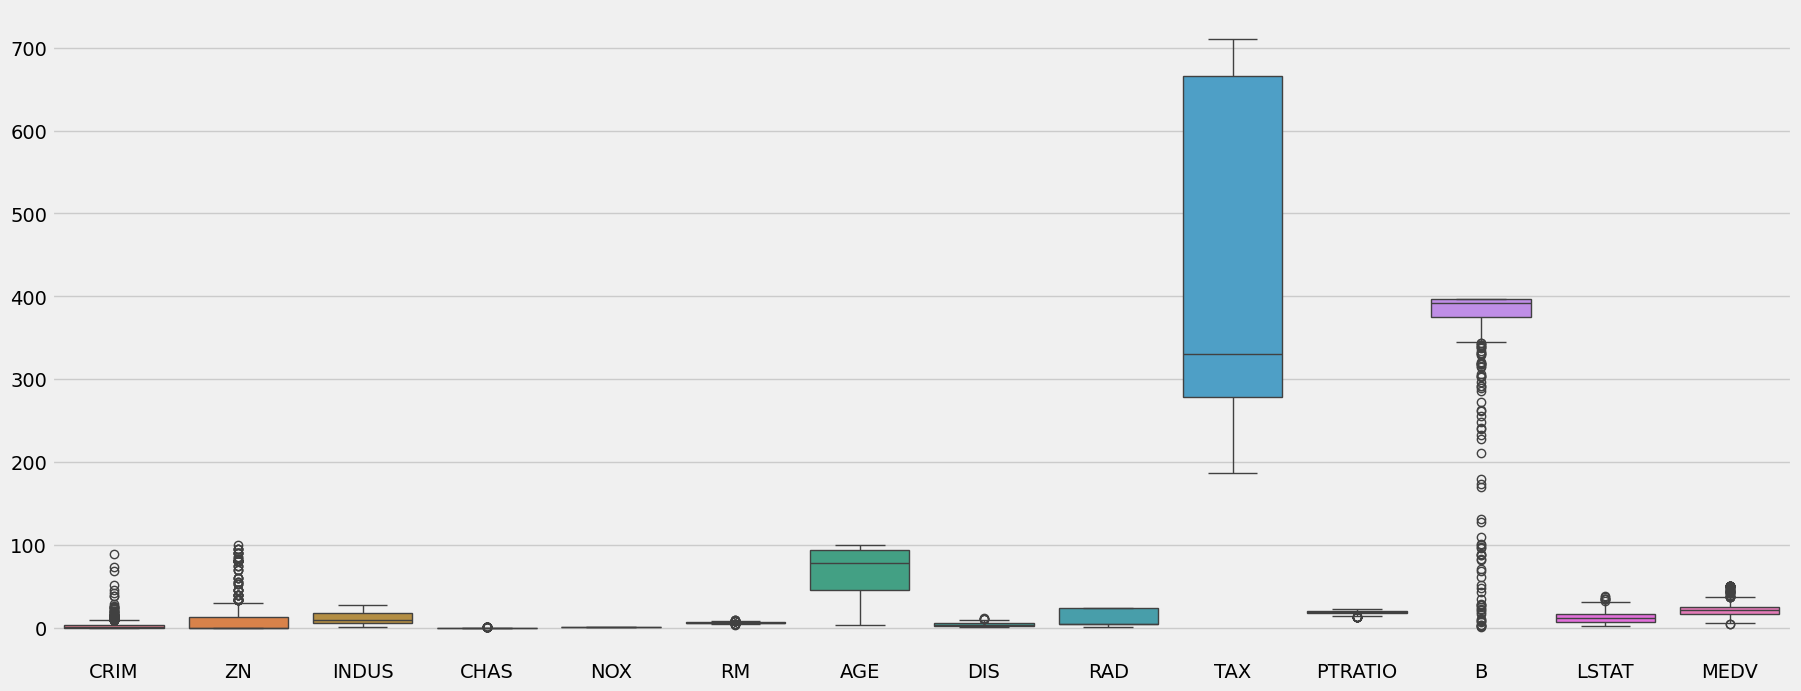

In [14]:
plt.figure(figsize= (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

In [15]:
# creating features and label variable

X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [18]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


### Variance Inflation Factor (VIF)

Variance Inflation Factor (VIF)는 다중 공선성(multicollinearity)을 측정하는 데 사용되는 통계적 지표입니다. 다중 공선성은 회귀 분석에서 독립 변수들이 서로 상관관계를 가질 때 발생하며, 이는 회귀 모델의 신뢰성을 떨어뜨릴 수 있습니다. VIF는 특정 독립 변수가 다른 모든 독립 변수들로부터 얼마나 예측 가능한지를 나타내며, 높은 VIF 값은 해당 변수가 다른 변수들과 강한 상관관계를 가지고 있음을 의미합니다.

#### VIF 계산 방법

VIF는 특정 독립 변수에 대한 회귀 모델을 생성하고, 그 모델의 결정계수 R²를 사용하여 다음과 같이 계산합니다:

$$
\text{VIF}(X_i) = \frac{1}{1 - R^2_i}
$$

여기서 R²_i는 독립 변수 X_i를 다른 모든 독립 변수들로 회귀했을 때의 결정계수입니다.

#### VIF 해석

- **VIF = 1**: 해당 변수는 다른 변수들과 전혀 상관관계를 가지지 않음.
- **1 < VIF < 5**: 다중 공선성이 의심되지 않는 범위.
- **VIF ≥ 5**: 다중 공선성이 의심됨.
- **VIF ≥ 10**: 다중 공선성이 매우 높으며, 문제를 일으킬 수 있음.

In [21]:
# dropping 'TAX' column from data

X.drop(columns = ['TAX'], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


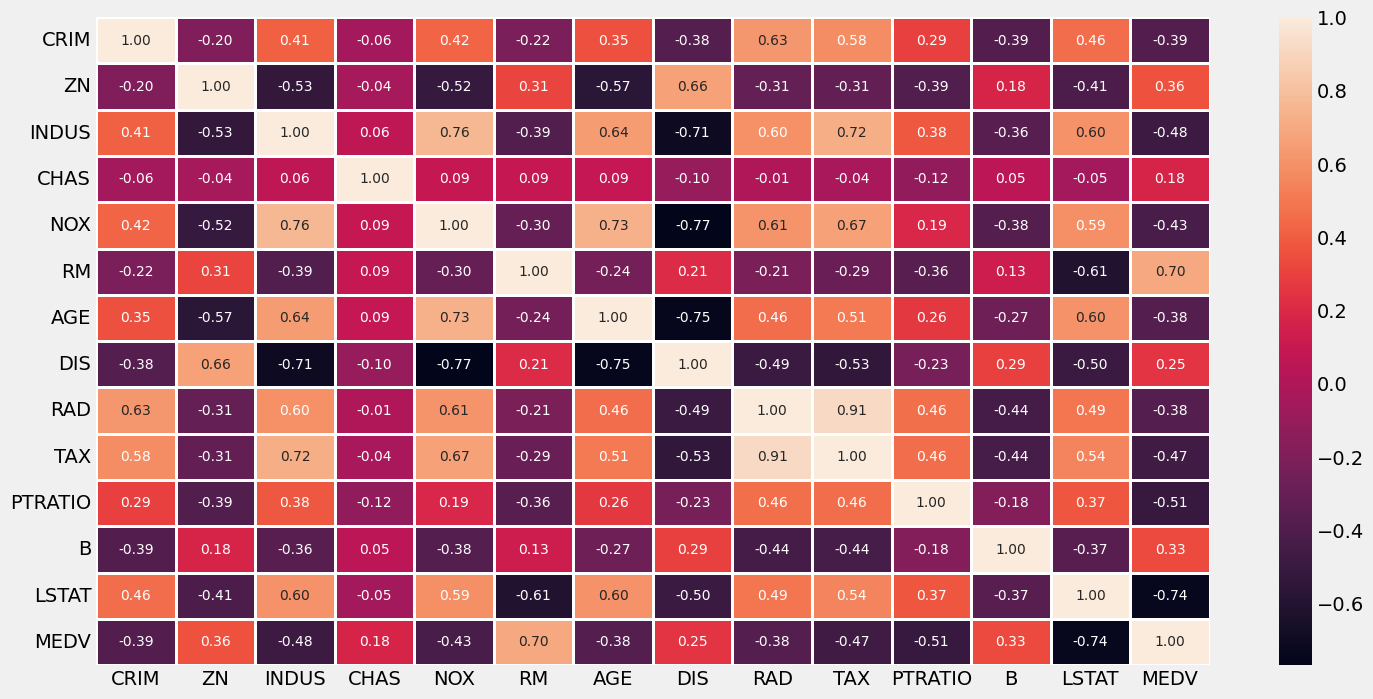

In [22]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

"RAD" and "TAX" columns are highly correlated which means multicollinearity is present so we have to remove one column.

In [23]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'MEDV ~ RAD', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           5.47e-19
Time:                        11:27:16   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm = smf.ols(formula = 'MEDV ~ TAX', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           5.64e-29
Time:                        11:27:34   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# removing "RAD" column

df.drop(columns = 'RAD', axis = 1, inplace = True)

In [26]:
# splitting data into training asnd test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

In [27]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# prediction of model

y_pred = lr.predict(X_test)

In [29]:
# training accuracy of model

lr.score(X_train, y_train)

0.7645451026942549

In [30]:
# test accuracy of model

lr.score(X_test, y_test)

0.6733825506400196

In [31]:
# creating a function to create adhusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [32]:
print(adj_r2(X_train, y_train, lr))

0.7555424154443293


In [33]:
print(adj_r2(X_test, y_test, lr))

0.642614240193065


Model r2 score is less on the test data so there is chance of overfitting, let's check this using regularization.

## Lasso

In [34]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [35]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.0005927671694272835

In [36]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0005927671694272835)

LassoCV 객체 생성: 교차 검증을 통해 최적의 알파 값을 자동으로 선택할 LassoCV 객체를 생성합니다.

모델 학습: X_train과 y_train을 사용하여 LassoCV 모델을 학습합니다.

최적의 알파 값 확인: 학습된 모델에서 최적의 알파 값을 추출합니다.

Lasso 모델 생성: 최적의 알파 값을 사용하여 Lasso 모델을 초기화합니다.

In [37]:
lasso.score(X_train, y_train)

0.7645448200811183

In [38]:
lasso.score(X_test, y_test)

0.6733278908244458

In [39]:
print(adj_r2(X_train, y_train, lasso))

0.7555421220253964


In [40]:
print(adj_r2(X_test, y_test, lasso))

0.6425544312644298


## Ridge

In [41]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.89542154, 8.3480252 , 3.12187682, 2.87480765, 5.28693155,
       0.50520113, 5.86329475, 1.88103723, 5.05618003, 6.96701695,
       6.97444797, 6.90336423, 9.0045894 , 7.08047914, 1.32063595,
       3.10926995, 0.18414105, 9.34052959, 5.12236688, 0.06978954,
       7.33390631, 4.87279046, 2.69610036, 3.61750032, 7.3428975 ,
       9.93207157, 0.25386141, 9.87212603, 1.38655139, 7.6091766 ,
       6.13885634, 9.41970784, 5.60659815, 3.75006965, 9.11310445,
       5.7182772 , 1.31474506, 6.49575061, 6.30111205, 2.72848662,
       6.02603753, 0.8963883 , 4.27509636, 0.26953547, 0.2389103 ,
       4.75340033, 8.4993729 , 3.38739636, 1.69051443, 5.45269755]),
        cv=10, normalize=True)

In [42]:
# best alpha parameter

alpha = ridge_cv.alpha_
alpha

0.06978953846106584

In [43]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.06978953846106584)

In [44]:
ridge.score(X_train, y_train)

0.7645450024354277

In [45]:
ridge.score(X_test, y_test)

0.6733394616753927

In [46]:
print(adj_r2(X_train, y_train, ridge))

0.7555423113520764


In [47]:
print(adj_r2(X_test, y_test, ridge))

0.6425670921230746


## Elastic Net

In [48]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=100000, normalize=True)

In [49]:
# best alpha parameter

alpha = elastic_net_cv.alpha_
alpha

0.0007274328772658819

In [50]:
# l1 ratio 

elastic_net_cv.l1_ratio

0.5

In [51]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.0007274328772658819)

In [52]:
elastic_net.score(X_train, y_train)

0.7645443099854741

In [53]:
elastic_net.score(X_test, y_test)

0.6732693989710944

In [54]:
print(adj_r2(X_train, y_train, elastic_net))

0.7555415924260951


In [55]:
print(adj_r2(X_test, y_test, elastic_net))

0.6424904293089511


## 정규화 하기 전이나 후나 r2스코어에 별다른 차이가 없음 => 과적합이 없었던 것으로 판단됨
